In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 

In [18]:
data = pd.read_csv('Datasets/Admission_Predict_Ver1.1.csv')
data = data.drop(data.columns[4:6], axis = 1)
data = data.drop(data.columns[0], axis = 1)
data.shape

(500, 6)

In [66]:
X_train = np.array(
    data[data.columns[:data.shape[1] - 1]]
)[:int(data.shape[0] * 3 / 4)]

for i in range(X_train.shape[1]):
    X_train[:, i] = X_train[:, i] / max(X_train[:, i])

y_train = np.array(
    data[data.columns[data.shape[1] - 1]]
)[:int(data.shape[0] * 3 / 4)]

for i in range(y_train.shape[0] - 1):
    y_train[i] = 1 if y_train[i] >= 0.70 else 0

X_test = np.array(
    data[data.columns[:data.shape[1] - 1]]
)[int(data.shape[0] * 3 / 4):]

for i in range(X_test.shape[1]):
    X_test[:, i] = X_test[:, i] / max(X_test[:, i])

y_test = np.array(
    data[data.columns[data.shape[1] - 1]]
)[int(data.shape[0] * 3 / 4):]

for i in range(y_test.shape[0] - 1):
    y_test[i] = 1 if y_test[i] >= 0.70 else 0

y_train

array([1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [76]:
w = np.ones(X_train.shape[1])
b = 1
m = X_train.shape[0]

In [77]:
def sigmoid(z):
    # Use a stable formulation for the sigmoid function
    return np.where(
        z >= 0,
        1 / (1 + np.exp(-z)),              # Standard computation for z >= 0
        np.exp(z) / (1 + np.exp(z))        # Alternate form for z < 0 to avoid overflow
    )

In [78]:
z_values = np.array([-1000, -10, 0, 10, 1000])
print(sigmoid(z_values))


[0.00000000e+00 4.53978687e-05 5.00000000e-01 9.99954602e-01
 1.00000000e+00]


C:\Users\adian\AppData\Local\Temp\ipykernel_22508\2701827505.py:5: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-z)),              # Standard computation for z >= 0
C:\Users\adian\AppData\Local\Temp\ipykernel_22508\2701827505.py:6: RuntimeWarning: overflow encountered in exp
  np.exp(z) / (1 + np.exp(z))        # Alternate form for z < 0 to avoid overflow
C:\Users\adian\AppData\Local\Temp\ipykernel_22508\2701827505.py:6: RuntimeWarning: invalid value encountered in divide
  np.exp(z) / (1 + np.exp(z))        # Alternate form for z < 0 to avoid overflow


In [79]:
def costs(w, b, m, X_train, y_train):
    cost = 0
    var1 = np.zeros(X_train.shape[1])
    var2 = 0
    for i in range(X_train.shape[0]):
        fxij = sigmoid(np.dot(X_train[i, :], w) + b)
        fxij = np.clip(fxij, 1e-15, 1 - 1e-15)
        cost += -(y_train[i] * (np.log(fxij)) + (1 - y_train[i]) * (np.log(1 - fxij)))
        for j in range(X_train.shape[1]):
            var1[j] += (fxij - y_train[i]) * X_train[i, j] 
        var2 += fxij - y_train[i]
    cost = cost / m
    var1 = var1 / m
    var2 = var2 / m
    return cost, var1, var2

In [80]:
def gradientDescent(w, b, m, X_train, y_train):
    alpha = 0.01
    iterations = 5000
    wn = w
    bn = b 
    for i in range(iterations):
        cost, var1, var2 = costs(wn, bn, m, X_train, y_train)
        for j in range(X_train.shape[1]):
                wn[j] = wn[j] - alpha * var1[j]
        bn = bn - alpha * var2
        print(f"iteration : {i} cost : {cost}")    
    return wn, bn

In [81]:
wn, bn = gradientDescent(w, b, m, X_train, y_train)

iteration : 0 cost : 1.6447875083061
iteration : 1 cost : 1.6399949931206788
iteration : 2 cost : 1.6352058876147235
iteration : 3 cost : 1.6304202338151728
iteration : 4 cost : 1.6256380742071785
iteration : 5 cost : 1.6208594517374786
iteration : 6 cost : 1.6160844098178089
iteration : 7 cost : 1.6113129923282197
iteration : 8 cost : 1.6065452436204366
iteration : 9 cost : 1.6017812085211456
iteration : 10 cost : 1.5970209323352886
iteration : 11 cost : 1.5922644608493117
iteration : 12 cost : 1.5875118403343804
iteration : 13 cost : 1.5827631175495884
iteration : 14 cost : 1.5780183397450982
iteration : 15 cost : 1.5732775546652846
iteration : 16 cost : 1.5685408105517948
iteration : 17 cost : 1.563808156146624
iteration : 18 cost : 1.5590796406950933
iteration : 19 cost : 1.5543553139488366
iteration : 20 cost : 1.549635226168701
iteration : 21 cost : 1.54491942812762
iteration : 22 cost : 1.5402079711134409
iteration : 23 cost : 1.5355009069316785
iteration : 24 cost : 1.530798287

In [82]:
y_pred = np.array([])
for i in range(X_test.shape[0]):
    y_pred = np.append(y_pred, [np.dot(X_test[i, :], wn) + bn])
y_pred

array([-0.55128488, -0.53901958, -0.8886675 , -0.89987229,  0.61279959,
        1.30335419,  1.30458708,  1.64880848, -0.18978201,  1.63094785,
        1.98515688, -0.54768105, -0.5570611 , -0.53732239,  1.29888716,
       -0.56040077, -0.21427273,  1.64417188, -0.56344917,  1.64264841,
        1.29515073,  1.29792485,  1.63678746, -0.20367979,  1.63340791,
       -0.54740261, -0.5645025 ,  1.29583662,  1.635722  ,  1.31288325,
       -0.19468559,  1.65367812,  1.32953582,  1.32808505, -0.89485398,
       -0.89581686, -0.55049653,  1.66277401,  1.30788337,  1.64816046,
        1.64832563, -0.21136962, -0.21330896, -0.56657217,  0.96346107,
       -0.19277468,  1.29560088,  1.64798944,  1.98253592,  1.9976786 ,
        2.0052773 , -0.20820739,  1.31885016, -0.56130038,  1.97843924,
        1.31174576,  0.94272802,  1.64680711,  0.13461953, -0.19998752,
       -0.5612461 ,  0.59519137,  0.59437793,  0.59293199, -0.56069494,
       -0.55524132,  0.57611627,  1.63566357,  2.00052756,  1.99

In [86]:
for i in range(y_test.shape[0]):
    if(y_pred[i] >= 0.5): y_pred[i] = 1
    else: y_pred[i] = 0
# print(classification_report(y_test, y_pred))

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0.])

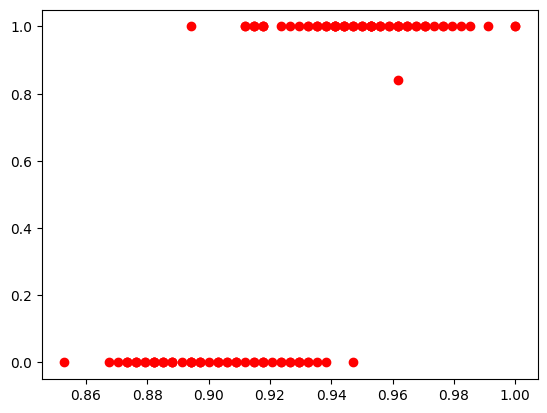

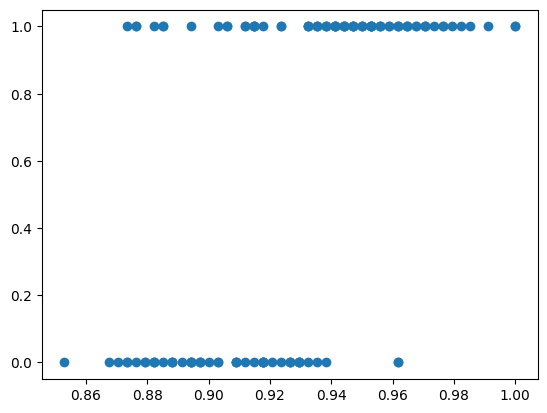

In [84]:
plt.scatter(X_test[:, 0], y_test, color = 'red')
plt.show()
plt.scatter(X_test[:, 0], y_pred)
plt.show()